# 1. Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

# 2. Data Loading

In [2]:
# Mount data from google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Create data directory
train_data_dir = "/content/drive/My Drive/Colab Notebooks/train_data_uint8.npy"
train_label_dir = "/content/drive/My Drive/Colab Notebooks/train_label.npy"

# Read data and label files in numpy array
image_data = np.load(train_data_dir)
image_labels = np.load(train_label_dir)

In [4]:
# https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays

# Get data dimension
print('Shape of image data:', image_data.shape) # 33126 images, each of size 224 x 224 x 3
print('Shape of image labels:', image_labels.shape)

Shape of image data: (33126, 224, 224, 3)
Shape of image labels: (33126,)


In [5]:
categorical_labels = tf.keras.utils.to_categorical(image_labels)
print(categorical_labels.shape)

(33126, 2)


In [6]:
categorical_labels[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [7]:
# Display random images
import random

def display_image(image_data):
    plt.figure(figsize = (15,15))
    n = 0
    for i in random.sample(range(0, image_data.shape[0]), 9):
        plt.subplot(3, 3, n + 1)
        plt.imshow(image_data[i])
        plt.xlabel(image_labels[i])
        n += 1
    plt.show()
    

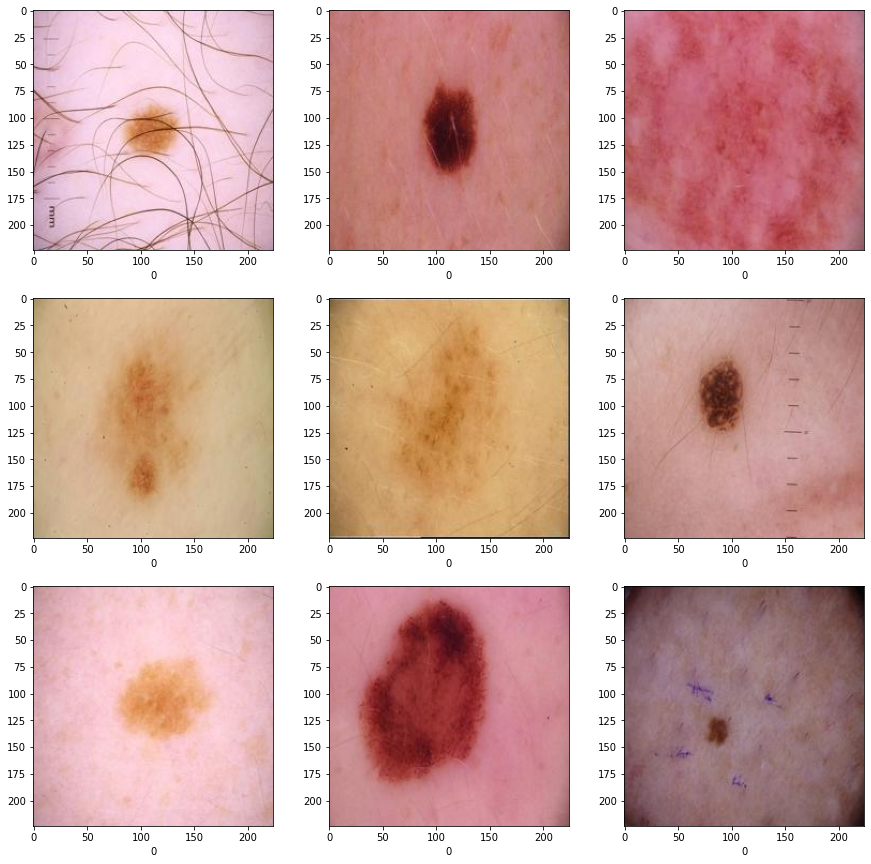

In [8]:
display_image(image_data)

# 3. Image Generator + Augmentation
Image augmentation is a very helpful technique that helps an image dataset to become artificially expanded by creating modified versions of the original images. The size of the training set is increased without acquiring new images. 

The goal of image augmentation is to preserve the features key to making predictions, but rearranges the pixels enough that it adds some noise. The newly generated images need to be very similar to what the model will be tested on.

In [9]:
BATCH_SIZE = 32

subset_images = image_data[:500] # Only use 500 images here: Crashing due to lack of RAM in Colab
subset_cat_labels = categorical_labels[:500]

subset_images.shape, subset_cat_labels.shape

((500, 224, 224, 3), (500, 2))

## 3.1 ImageDataGenerator

How does image generator works?
https://stackoverflow.com/questions/51748514/does-imagedatagenerator-add-more-images-to-my-dataset

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Flipping the image horizontally

In [11]:
#https://keras.io/api/preprocessing/image/
#https://stackoverflow.com/questions/47494896/what-is-the-meaning-of-rank-4-of-data-in-the-flow-method-of-imagedatagenerator


image_gen_hflip = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_hflip = image_gen_hflip.flow(
    x = subset_images, #image_data,
    y = subset_cat_labels, #categorical_labels,
    batch_size = BATCH_SIZE,
    shuffle = True,
    #sample_weight=None,
    seed = 42,
    #save_to_dir=None,
    #save_prefix="",
    #save_format="png",
    #subset=None,
)

In [12]:
# This function will plot images in the form of a grid with 1 row and 6 columns where images are placed in each column.
def display_aug_images(images_arr):
    fig, axes = plt.subplots(1, 6, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


Two sample image from the training set and repeat it 6 times. 
The augmentation will be randomly applied (or not) to each repetition.

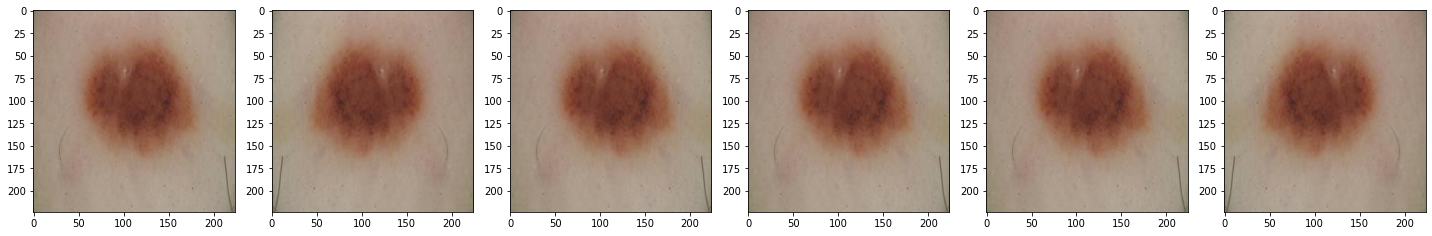

In [13]:
images_hflip = [train_data_hflip[0][0][0] for i in range(6)]
display_aug_images(images_hflip)

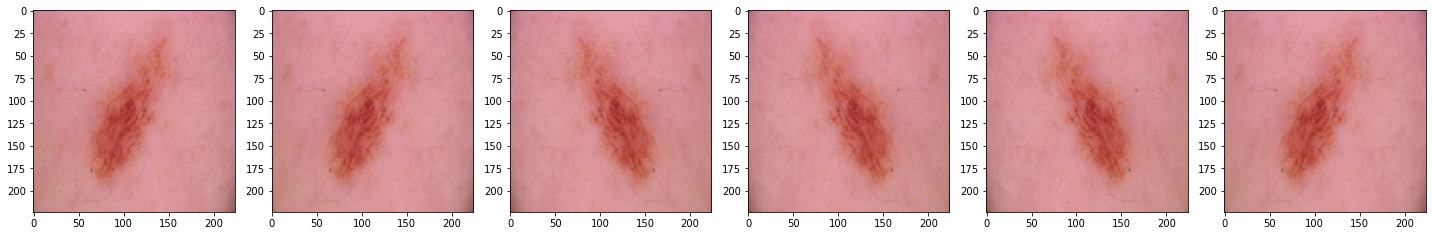

In [14]:
images_hflip2 = [train_data_hflip[0][0][2] for i in range(6)]
display_aug_images(images_hflip2)

### Rotating the image

In [15]:
image_gen_rotate = ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_rotate = image_gen_rotate.flow(
    x = subset_images, #image_data,
    y = subset_cat_labels, #categorical_labels,
    batch_size = BATCH_SIZE,
    shuffle = True,
    #sample_weight=None,
    seed = 42,
    #save_to_dir=None,
    #save_prefix="",
    #save_format="png",
    #subset=None,
)

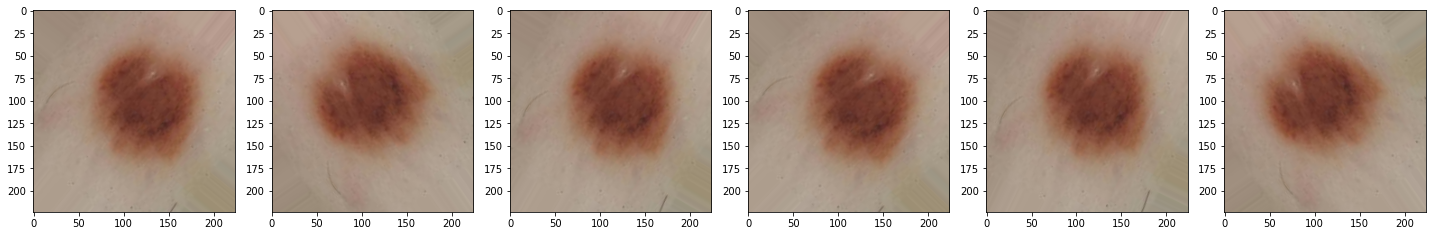

In [16]:
images_rotate = [train_data_rotate[0][0][0] for i in range(6)]
display_aug_images(images_rotate)

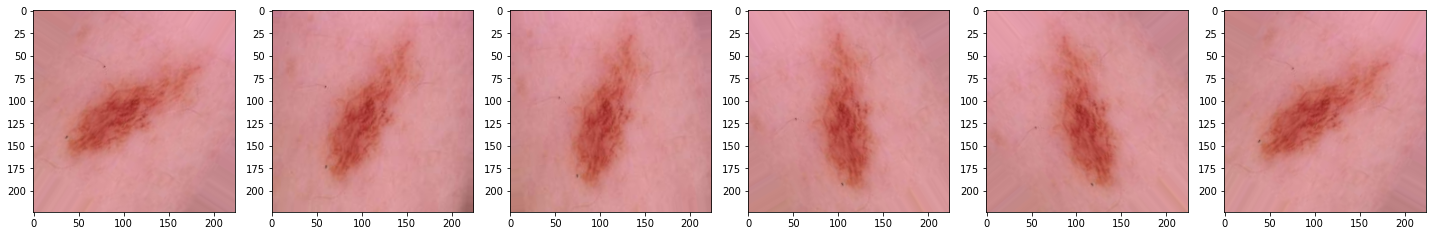

In [17]:
images_rotate2 = [train_data_rotate[0][0][2] for i in range(6)]
display_aug_images(images_rotate2)

### Applying Zoom

Zooming images up to 50% randomly.

In [18]:
# Not sure whether zoom applies here which causes great distortion....

image_gen_zoom = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_zoom = image_gen_zoom.flow(
    x = subset_images, #image_data,
    y = subset_cat_labels, #categorical_labels,
    batch_size = BATCH_SIZE,
    shuffle = True,
    #sample_weight=None,
    seed = 42
    #save_to_dir=None,
    #save_prefix="",
    #save_format="png",
    #subset=None,
)

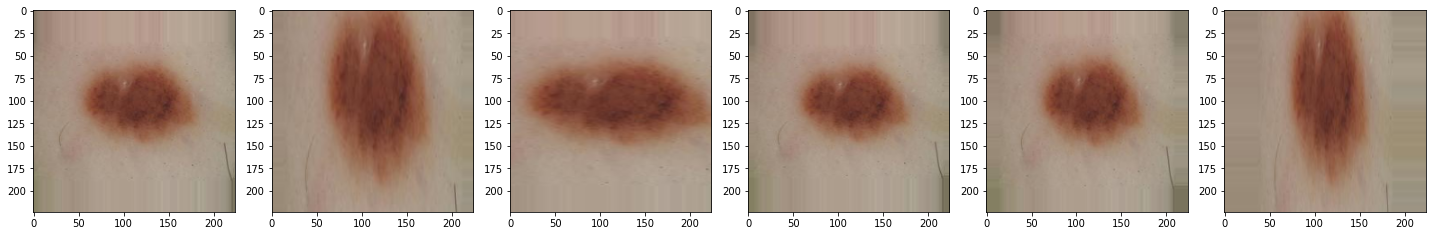

In [19]:
images_zoom = [train_data_zoom[0][0][0] for i in range(6)]
display_aug_images(images_zoom)

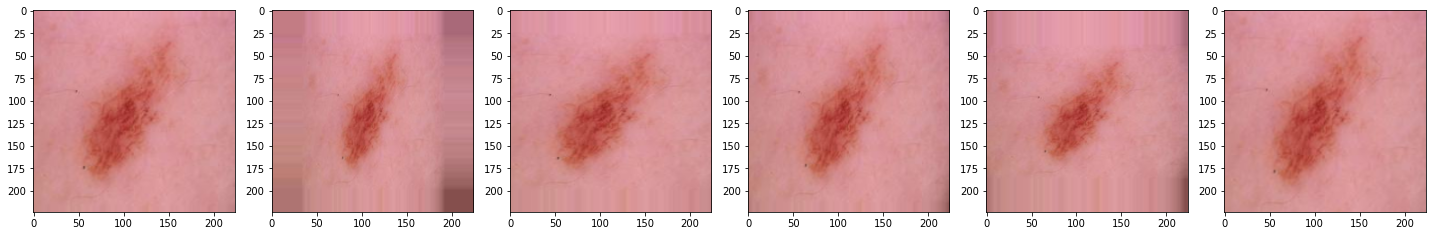

In [20]:
images_zoom2 = [train_data_zoom[0][0][2] for i in range(6)]
display_aug_images(images_zoom2)

### Combining all augmentations

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        subset_images, subset_cat_labels, 
                                        test_size = 0.20, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 224, 224, 3), (100, 224, 224, 3), (400, 2), (100, 2))

In [22]:
# https://theailearner.com/2019/07/06/imagedatagenerator-flow-method/
# https://stackoverflow.com/questions/62662194/keras-imagedatagenerator-validation-split-not-selected-from-shuffled-dataset

image_gen_train = ImageDataGenerator(
                          rescale=1./255,
                          rotation_range = 45,
                          width_shift_range = 0.2,
                          height_shift_range = 0.2,
                          shear_range = 0.2,
                          zoom_range = 0.3,
                          horizontal_flip = True,
                          vertical_flip = True,
                          fill_mode = 'nearest',
                          #validation_split = 0.2 # need to shuffle before training
)

train_data_gen = image_gen_train.flow(
    x = X_train, #image_data,
    y = y_train, #categorical_labels,
    batch_size = BATCH_SIZE,
    shuffle = True,
    #sample_weight=None,
    seed = 42
    #save_to_dir=None,
    #save_prefix="",
    #save_format="png",
    #subset = 'training'
)

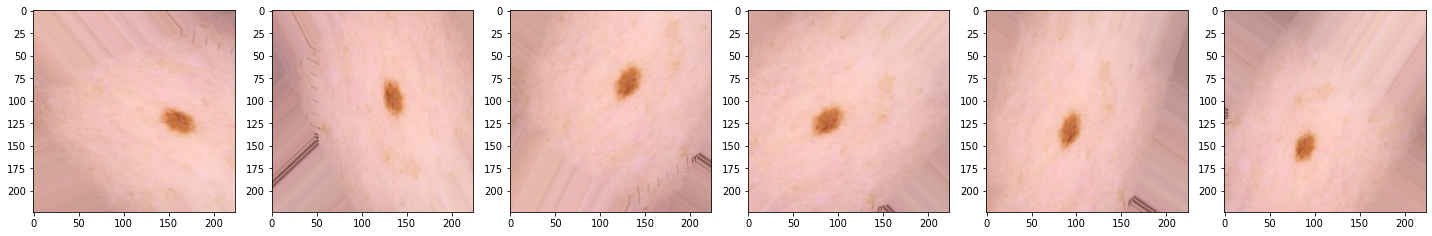

In [23]:
aug_images = [train_data_gen[0][0][0] for i in range(6)]
display_aug_images(aug_images)

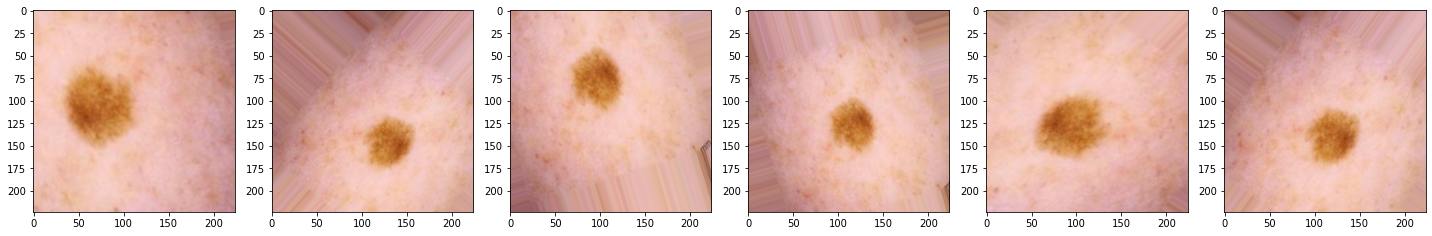

In [24]:
aug_images2 = [train_data_gen[0][0][2] for i in range(6)]
display_aug_images(aug_images2)

### Creating Validation Data generator

Generally, we only apply data augmentation to our training examples, since the original images should be representative of what our model needs to manage. So, in this case we are only rescaling our validation images and converting them into batches using ImageDataGenerator.

In [25]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow(
    x = X_test, #image_data,
    y = y_test, #categorical_labels,
    batch_size = BATCH_SIZE,
    shuffle = True,
    #sample_weight=None,
    seed = 42
    #save_to_dir=None,
    #save_prefix="",
    #save_format="png",
    #subset = 'validation' #error: Training and validation subsets have different
                           #number of classes after the split. If your numpy arrays
                           #are sorted by the label, you might want to shuffle them.
)

## ImageDataGenerator Model Creation (simple CNN)

### Create the model

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2)
])

### Compiling the model

In [27]:
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

### Model Summary

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

### Train the model

In [31]:
%%time

epochs = 20

history = model.fit(
    train_data_gen,
    steps_per_epoch = int(np.ceil(len(X_train) / float(BATCH_SIZE))), # 13
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(len(X_test) / float(BATCH_SIZE))) # 4
)

Epoch 1/20
13/13 [==============================] - 4s 321ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 2/20
13/13 [==============================] - 4s 321ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 3/20
13/13 [==============================] - 4s 320ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 4/20
13/13 [==============================] - 4s 321ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 5/20
13/13 [==============================] - 4s 322ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 6/20
13/13 [==============================] - 4s 320ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 7/20
13/13 [==============================] - 4s 321ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 

### Visualizing results of the training

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

In [33]:
# Define a function to display accuracy and loss
def training_acc_visual(acc, val_acc, loss, val_loss):
    plt.figure(figsize = (8, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label = 'Training Accuracy')
    plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'upper right')
    plt.title('Training and Validation Loss')
    plt.show()

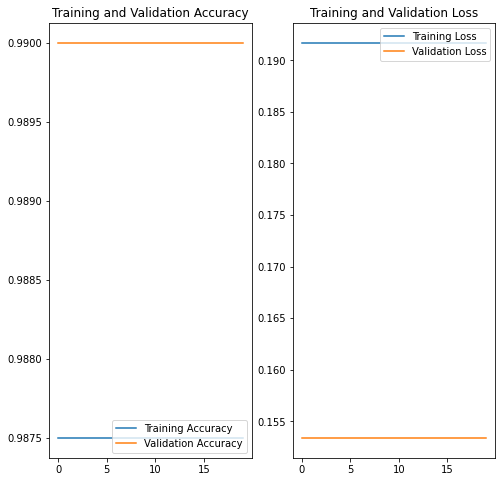

In [34]:
training_acc_visual(acc, val_acc, loss, val_loss)

## 3.2 ImageDataGenerator + Albumentations

In [35]:
# https://medium.com/the-artificial-impostor/custom-image-augmentation-with-keras-70595b01aeac

from tensorflow.python.keras.utils.data_utils import Sequence

In [36]:
# Custom Augmentation using the Sequence API

class ImageSequence(Sequence):
    def __init__(self, x, y, batch_size, augmentations):
        self.x, self.y = x, y
        self.batch_size = batch_size
        self.augment = augmentations

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        return np.stack([
            self.augment(image = x)["image"] for x in batch_x], axis = 0), np.array(batch_y)

In [37]:
# use albumentations to define a set of augmentations to be applied randomly to 
# training set and a (deterministic) set for the test and validation sets:

# https://albumentations.readthedocs.io/en/latest/api/augmentations.html

import cv2
from albumentations import (
    Compose, Flip, OneOf, RandomGamma, RandomBrightness, RandomContrast, HueSaturationValue,
    ToGray, CLAHE, ShiftScaleRotate, ToFloat 
)

AUGMENTATIONS_TRAIN = Compose([
        Flip(p = 0.5), #Flip the input either horizontally, vertically or both

        OneOf([
        RandomGamma(gamma_limit = (80, 120), p = 0.5), 
        #gamma correction: a nonlinear operation used to encode and decode luminance 
        #or tristimulus values in video or still image systems.
        RandomBrightness(limit = 0.2, p = 0.5), #Randomly change brightness
        RandomContrast(limit = 0.2, p = 0.5)], #Randomly change cntrast
        p=0.3),

        HueSaturationValue(hue_shift_limit = 5, #Randomly change hue, saturation and value
                           sat_shift_limit = 20,
                           val_shift_limit = 10, p = 0.9),

        ToGray(always_apply = False, p = 0.5), #Convert the input RGB image to grayscale. 

        # CLAHE(p=1.0, clip_limit=2.0), #Apply Contrast Limited Adaptive Histogram 
                                        #Equalization to the input image. (For GPU, but not TPU)

        ShiftScaleRotate( #Randomly apply affine transforms: translate, scale and rotate the input.
                      shift_limit = 0.0625, 
                      scale_limit = 0.1, 
                      rotate_limit = 30, 
                      border_mode = cv2.BORDER_REFLECT_101, p = 0.6), 
                      ToFloat(max_value = 255) # recale to [0,1]
])

AUGMENTATIONS_TEST = Compose([
                      # CLAHE(p=1.0, clip_limit=2.0),
                      ToFloat(max_value = 255)
])

In [38]:
# Creat image generator

albu_train_gen = ImageSequence(X_train, y_train, BATCH_SIZE, 
                               augmentations = AUGMENTATIONS_TRAIN)

albu_val_gen = ImageSequence(X_test, y_test, BATCH_SIZE, 
                               augmentations = AUGMENTATIONS_TRAIN)

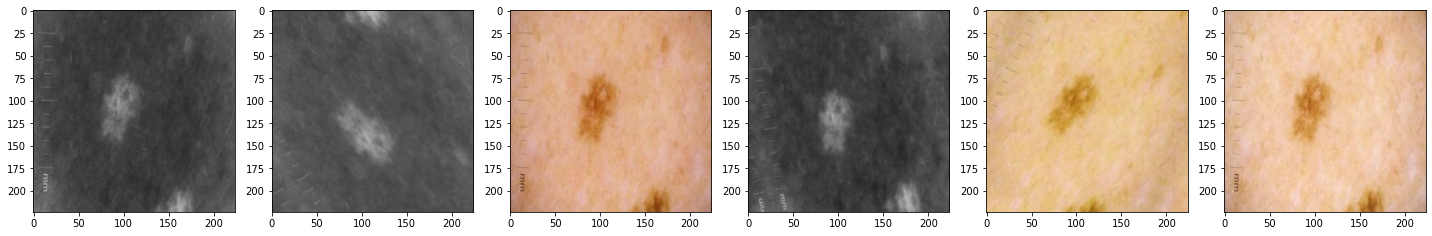

In [39]:
albu_aug_images = [albu_train_gen[0][0][0] for i in range(6)]
display_aug_images(albu_aug_images)

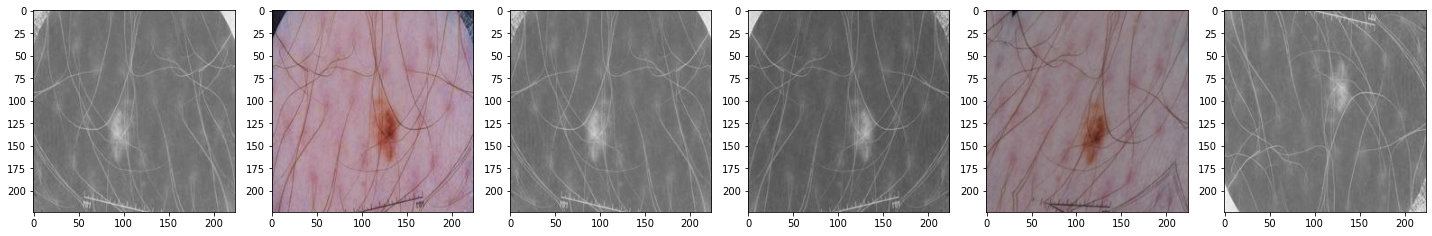

In [40]:
albu_aug_images2 = [albu_train_gen[0][0][2] for i in range(6)]
display_aug_images(albu_aug_images2)

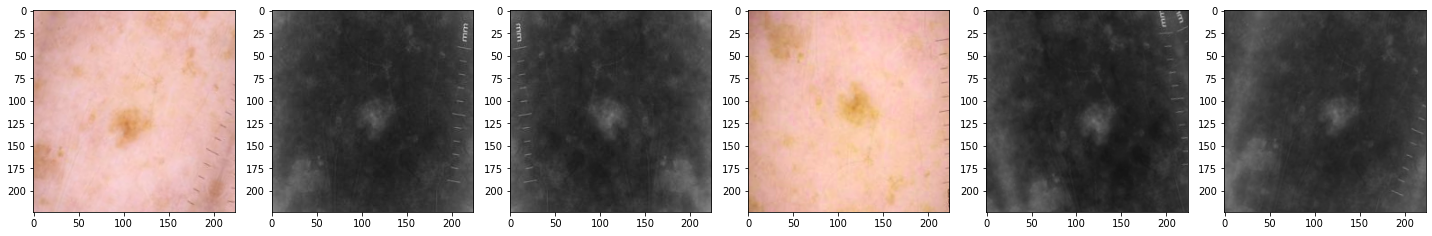

In [41]:
albu_aug_images5 = [albu_train_gen[0][0][5] for i in range(6)]
display_aug_images(albu_aug_images5)

### Train the model

In [42]:
%%time

epochs = 20 

history2 = model.fit(
    albu_train_gen,
    steps_per_epoch = int(np.ceil(len(X_train) / float(BATCH_SIZE))), # 13
    epochs = epochs,
    validation_data = albu_val_gen,
    validation_steps = int(np.ceil(len(X_test) / float(BATCH_SIZE))) # 4
)

Epoch 1/20
13/13 [==============================] - 2s 126ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 2/20
13/13 [==============================] - 2s 116ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 3/20
13/13 [==============================] - 2s 116ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 4/20
13/13 [==============================] - 2s 118ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 5/20
13/13 [==============================] - 1s 115ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 6/20
13/13 [==============================] - 1s 115ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 7/20
13/13 [==============================] - 1s 115ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 

In [43]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(epochs)

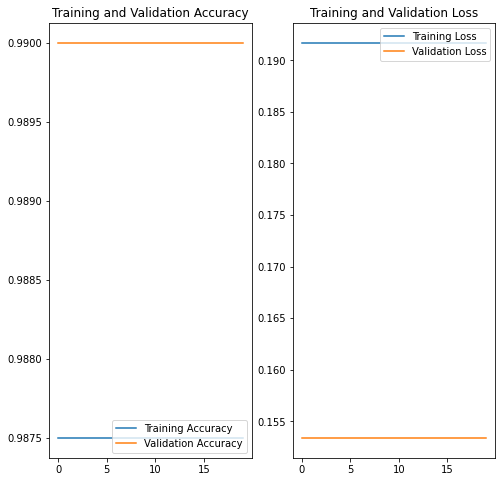

In [44]:
training_acc_visual(acc2, val_acc2, loss2, val_loss2)

## 3.3 ImageDataAugmentor (Happendd to find this package online, just for exploration)
ImageDataAugmentor is a custom image data generator for Keras supporting the use of modern augmentation modules (e.g. imgaug and albumentations). 

The installation and usage of ImageDataAugmentor can be found here:
[https://github.com/mjkvaak/ImageDataAugmentor/blob/master/README.md]

In [45]:
 # https://github.com/mjkvaak/ImageDataAugmentor
 # https://www.kaggle.com/mikkojkvaak/digit-training-with-imagedataaugmentor

!pip install git+https://github.com/mjkvaak/ImageDataAugmentor

  Cloning https://github.com/mjkvaak/ImageDataAugmentor to /tmp/pip-req-build-zh71aq_y
  Running command git clone -q https://github.com/mjkvaak/ImageDataAugmentor /tmp/pip-req-build-zh71aq_y
     |████████████████████████████████| 49.4MB 1.7MB/s 
  Created wheel for ImageDataAugmentor: filename=ImageDataAugmentor-0.0.0-cp36-none-any.whl size=28016 sha256=fa59e9301f757917fdd24962a8683e2562eba213fa252736c6498f572cc94286
  Stored in directory: /tmp/pip-ephem-wheel-cache-p3p9xkit/wheels/d9/10/55/6fca35a4072f87d694876d56ece64db3846cf45e1da1c381fe
Successfully built ImageDataAugmentor
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [46]:
from ImageDataAugmentor.image_data_augmentor import *

In [47]:
augmentor_train_gen = ImageDataAugmentor(
    #featurewise_center = True,
    augment = AUGMENTATIONS_TRAIN)

aug_train_gen = augmentor_train_gen.flow(X_train, y_train, 
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     seed = 42
)

augmentor_val_gen = ImageDataAugmentor(
    augment = ToFloat(max_value = 255))

aug_val_gen = augmentor_val_gen.flow(X_test, y_test, 
                                 batch_size = BATCH_SIZE, 
                                 shuffle = True,
                                 seed = 42
)


### Train the model

In [50]:
%%time

epochs = 20 

history3 = model.fit(
    aug_train_gen,
    steps_per_epoch = int(np.ceil(len(X_train) / float(BATCH_SIZE))), # 13
    epochs = epochs,
    validation_data = aug_val_gen,
    validation_steps = int(np.ceil(len(X_test) / float(BATCH_SIZE))) # 4
)

Epoch 1/20
13/13 [==============================] - 2s 134ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 2/20
13/13 [==============================] - 2s 123ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 3/20
13/13 [==============================] - 2s 128ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 4/20
13/13 [==============================] - 2s 125ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 5/20
13/13 [==============================] - 2s 127ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 6/20
13/13 [==============================] - 2s 129ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 7/20
13/13 [==============================] - 2s 132ms/step - loss: 0.1917 - accuracy: 0.9875 - val_loss: 0.1534 - val_accuracy: 0.9900
Epoch 

In [51]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs_range = range(epochs)

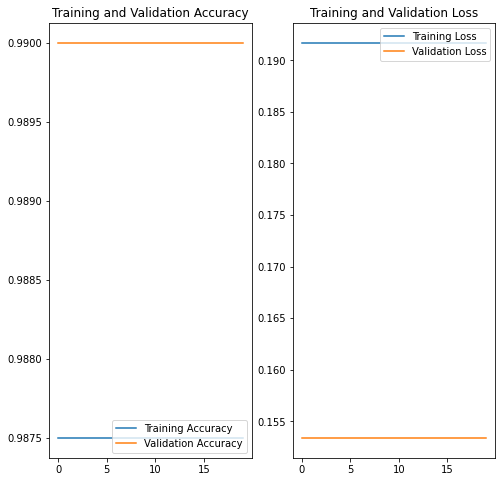

In [52]:
training_acc_visual(acc3, val_acc3, loss3, val_loss3)